## Customer Support Ticket Classification Using Different Natural Language Processing Algorithms: Explorative Study

### Package installation

In [1]:
# Importing libraries needed for package installation
import subprocess
import sys

# Creating a lost with all of the required packages
packages = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'nltk',
    'wordcloud',
    'scikit-learn',
    'tensorflow[and-cuda]',
    'tf_keras',
    'transformers'
]

# Creating a function to install the packages
def install_packages():
    for package in packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Calling the function to install the packages
install_packages()

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Library Import

In [ ]:
### Importing all the needed libraries for the project

# Libraries for basic operations, data handling, and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Libraries for text vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for data preprocessing and results evaluation
from sklearn.utils import resample
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Libraries for the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Libraries for neural networks
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D, Dense, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification, AdamWeightDecay

# Libraries for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Downloading the necessary resources for NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Notebook Settings

In [3]:
# Adjusting display settings, so we could see full columns and rows in display functions
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Upload

In [4]:
# Loading the dataset
file = "customer_support_tickets.csv"
df = pd.read_csv(file)

### Initial Exploratory Data Analysis and Cleaning

In [5]:
print(f"Customer Support Tickets Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Customer Support Tickets Dataset has 28587 rows and 16 columns


In [6]:
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [7]:
# Filtering the dataset to only have English tickets
df = df[df['language']=='en']

### Missing Values and Duplicates Check

In [8]:
# Checking dataset for null values
df.isnull().sum()

subject      2607
body            0
answer          3
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
tag_2           6
tag_3          69
tag_4        1711
tag_5        7922
tag_6       12968
tag_7       15204
tag_8       16057
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().any()

np.False_

### Column Exploration

In [11]:
# Creating a function that return number of unique words in the column
def check_unique_words(column):
    # Lowercasing all text joining into one string
    all_text = " ".join(df[column].astype(str).str.lower())
    
    # Splitting all the words up
    words = all_text.split()
    
    # Reducing to only unique words
    unique_words = set(words)
    
    # Printing the number of unique words
    print(f"Column '{column}' has {len(unique_words)} unique words")

Checking the number of unqiue words in body

In [12]:
check_unique_words('body')

Column 'body' has 10315 unique words


### Ticket Type Imbalance Check

In [13]:
# Checking queue value distribution
summary = pd.DataFrame({'count': df['queue'].value_counts(), 'percentage': (df['queue'].value_counts(normalize=True) * 100).round(2)})
print(summary)

                                 count  percentage
queue                                             
Technical Support                 4737       28.99
Product Support                   3073       18.81
Customer Service                  2410       14.75
IT Support                        1942       11.89
Billing and Payments              1595        9.76
Returns and Exchanges              820        5.02
Service Outages and Maintenance    664        4.06
Sales and Pre-Sales                513        3.14
Human Resources                    348        2.13
General Inquiry                    236        1.44


### Reducing DataFrame to necessary columns

In [14]:
# Manually selecting columns to keep
columns_to_keep = ['queue', 'body']

# Dropping all other columns
df = df[columns_to_keep]

### Balancing the dataset

Merge labels to 'Other' with less than 1000 entries

In [15]:
# Creating a mapping to rename old labels into new labels
merge_map = {
    'Technical Support': 'Technical Support',
    'Product Support': 'Product Support',
    'Customer Service': 'Customer Service',
    'IT Support': 'IT Support',
    'Billing and Payments': 'Billing and Payments',
    'Returns and Exchanges': 'Other',
    'Service Outages and Maintenance': 'Other',
    'Sales and Pre-Sales': 'Other',
    'Human Resources': 'Other',
    'General Inquiry': 'Other'
}

# Applying the mapping to rename values in the queue column
df['queue'] = df['queue'].map(merge_map)

Undersample Technical Support and Product Support

In [16]:
# Creating a dataframe for Technical Support values
df_tec = df[df['queue'] == 'Technical Support']
# Creating a dataframe for Product Support values
df_sup = df[df['queue'] == 'Product Support']
# Creating a dataframe with all the remaning values
df_minority = df[(df['queue'] != 'Technical Support') & (df['queue'] != 'Product Support')]

# Downsampling the majority class (Technical Support) to have 2500 observations without replacement
df_tec_downsampled = resample(df_tec, 
                                   replace=False,    
                                   n_samples=2500,  
                                   random_state=42) 

# Downsampling the majority class (Product Support) to have 2500 observations without replacement
df_sup_downsampled = resample(df_sup, 
                                   replace=False,    
                                   n_samples=2500,  
                                   random_state=42)  

# Combining the minority class with the downsampled majority classes
df = pd.concat([df_tec_downsampled, df_sup_downsampled, df_minority])

Oversample IT support and Billing and Payments

In [17]:
# Creating a dataframe for IT Support values
df_it = df[df['queue'] == 'IT Support']
# Creating a dataframe for Billing and Payments values
df_bill = df[df['queue'] == 'Billing and Payments']
# Creating a dataframe for all remaining values
df_majority = df[(df['queue'] != 'IT Support') & (df['queue'] != 'Billing and Payments')]

# Upsampling the minority class (IT Support) to have 2500 observations with replacement
df_it_upsampled = resample(df_it, 
                                 replace=True,    
                                 n_samples=2500,  
                                 random_state=42)  

# Upsampling the minority class (Billing and Payments) to have 2500 observations with replacement
df_bill_upsampled = resample(df_bill, 
                                 replace=True,    
                                 n_samples=2500,  
                                 random_state=42)  

# Combining the majority class with the upsampled minority classes
df = pd.concat([df_majority, df_it_upsampled, df_bill_upsampled])

In [18]:
# Resetting the index
df.reset_index(drop=True, inplace=True)

In [19]:
# Checking queue value distribution again
summary = pd.DataFrame({'count': df['queue'].value_counts(), 'percentage': (df['queue'].value_counts(normalize=True) * 100).round(2)})
print(summary)

                      count  percentage
queue                                  
Other                  2581       17.22
Technical Support      2500       16.68
Product Support        2500       16.68
IT Support             2500       16.68
Billing and Payments   2500       16.68
Customer Service       2410       16.08


### Data Types Check

In [20]:
# Checking data types of columns
df.dtypes

queue    object
body     object
dtype: object

### Check Column Stas

In [21]:
# Quickly checking the dataset's columns of statistical properties
df.describe()

,queue,body
count,14991,14991
unique,6,12596
top,Other,There was an unapproved access to medical data...
freq,2581,8


### Body column 

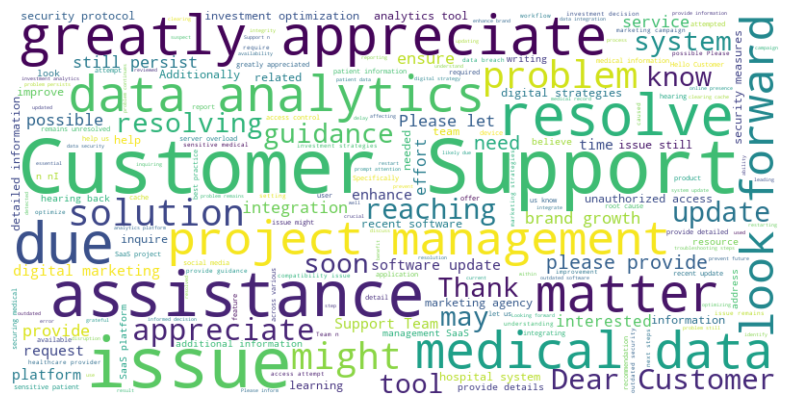

In [22]:
# Combining all text from the column body into a single string
text_data = ' '.join(df['body'])

# Creating a WordCloud object for plotting later
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Text Preprocessing

In [ ]:
# Initialising lemmatiser and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Helper function for preprocessing

In [ ]:
# Creating a function to preprocess the main text
def preprocess_text(text):
    # Replacing newline characters \n
    text = text.replace('\n', ' ')

    # Removing all HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    
    # Lowercasing the text
    text = text.lower()
    
    # Removing punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenising the text
    tokens = word_tokenize(text)
    
    # Removing stopwords and appling lemmatisation
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Returning the processed text
    return ' '.join(processed_tokens)

In [25]:
# Preprocessign both subject and description columns and combining them
df['text'] = df['body'].apply(preprocess_text)

# Checking unique word count in the text column
check_unique_words('text')

print("\n")

# Checking the processed text
df['text'].head()

Column 'text' has 4839 unique words




0    dear support reaching request detailed documen...
1    customer support report user frequently encoun...
2    customer support report user frequently encoun...
3    digital marketing tool malfunctioning impeding...
4    digital marketing analytics dashboard updating...
Name: text, dtype: object

Encoding target variable

In [26]:
# Initialising the LabelEncoder
encoder = LabelEncoder()

# Encoding the target variable (queue)
df['queue_encoded'] = encoder.fit_transform(df['queue'])

# Checking the encoding
df[['queue', 'queue_encoded']].drop_duplicates()

# Creating a mapping of encoded labels back to their original string labels
target_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Showing the the mapping
print(target_mapping)

{'Billing and Payments': np.int64(0), 'Customer Service': np.int64(1), 'IT Support': np.int64(2), 'Other': np.int64(3), 'Product Support': np.int64(4), 'Technical Support': np.int64(5)}


### Text Vectorisation for traditional machine learning

In [27]:
# Initialisig TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

# Fitting and transforming the training data
X_tfidf = vectorizer.fit_transform(df['text'])

# Checking the shape of the TF-IDF matrix
X_tfidf.shape

(14991, 3000)

### Text Vectorisation for neural networks

In [28]:
# Analysing sequence lengths for maxlen padding
lengths = [len(text.split()) for text in df['text']]
max_length = int(np.percentile(lengths, 95))

print(f"Using max_length: {max_length}")
print(f"This covers {(np.array(lengths) <= max_length).mean()*100:.1f}% of tickets")

Using max_length: 54
This covers 95.7% of tickets


In [ ]:
# Initialising Tokeniser
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# Fitting the tokeniser on the text column
tokenizer.fit_on_texts(df['text'])

# Converting text into sequences of integers
X_seq = tokenizer.texts_to_sequences(df['text'])

# Padting sequences to make them of equal length
X_pad = pad_sequences(X_seq, maxlen=100)

# Checking the shape of padded sequences
X_pad.shape


(14991, 100)

### Train-Test Split

In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['queue_encoded'], test_size=0.2, random_state=42)

# Using the padded sequences for neural networks 
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_pad, df['queue_encoded'], test_size=0.2, random_state=42)


### Text preprocessing for BERT

In [ ]:
# Initiating the BERT tokeniser
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenising the texts (input)
X = tokenizer(df['body'].tolist(), padding=True, truncation=True, max_length=100, return_tensors="tf")
y = df['queue_encoded'].values

# Extracting input_ids and attention_mask and converting to numpy for split
X_input_ids = X['input_ids'].numpy()
X_attention_mask = X['attention_mask'].numpy()

Train-Test Split

In [ ]:
# Doing the train-test split
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train_bert, y_test_bert = train_test_split(X_input_ids, X_attention_mask, y, test_size=0.2, random_state=42)

# Converting back to TensorFlow tensors for model training
X_train_ids = tf.constant(X_train_ids)
X_test_ids = tf.constant(X_test_ids)
X_train_mask = tf.constant(X_train_mask)
X_test_mask = tf.constant(X_test_mask)

### Helper functions for training and evaluation

Evaluation

In [31]:
# Creating a function to evaluate the performance of a model
def evaluate(model, x_train, y_train, y_test, y_pred):
    print(f"Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}\n") # Checking overfitting
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}\n")
    print(classification_report(y_test, y_pred))

Train and fit

In [32]:
# Creating a fuction that would fit a model and do prediction
def train_and_fit(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred

### Traditional machine learning algorithms

First run of models with default parameters

In [ ]:
# Defining the models that will be used
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Multinominal Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Creating a loop for each model to train/fit, predict, and get the accuracy of the models
for name, model in models.items():
    y_pred = train_and_fit(model, X_train, y_train, X_test)
    print(f"\n{name}:\n")
    # Display parameters
    print(f"Parameters: {model.get_params()}\n")
    # Evaluation
    evaluate(model, X_train, y_train, y_test, y_pred)


Logistic Regression:

Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Training Accuracy: 0.6628585723815877

Test Accuracy: 0.5151717239079693

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       470
           1       0.43      0.41      0.42       484
           2       0.49      0.55      0.52       488
           3       0.50      0.51      0.51       536
           4       0.44      0.39      0.41       519
           5       0.40      0.42      0.41       502

    accuracy                           0.52      2999
   macro avg       0.52      0.52      0.52      2999
weighted avg       0.51      0.52      0.51      2999


Multinominal Naive Bayes:

Parameters: {'alpha': 1.0, 'class_prio

### Hyperparameter Optimisation

#### Random Forest


- n_estimators: Number of trees in the forest.

- max_depth: Maximum depth of each tree.

- min_samples_split: Minimum number of samples required to split a node.

- min_samples_leaf: Minimum number of samples required to be at a leaf node.

- max_features: method for deciding how many features are selected at each split

In [ ]:
# Defining the hyperparameter grid
param_grid_rf = {
    'n_estimators': [200, 300],
    'max_depth': [20, 25],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Setting up the GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=3)

# Training and fitting the model
y_pred_rf = train_and_fit(rf_grid_search, X_train, y_train, X_test)

# Displaying the best parameters and the best score
print(f"\nBest Parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best Accuracy for Random Forest: {rf_grid_search.best_score_}")

# Getting the best model from GridSearch
best_rf = rf_grid_search.best_estimator_

print("\nRandom Forest:\n")
evaluate(rf_grid_search, X_train, y_train, y_test, y_pred_rf)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.400 total time=   0.3s


[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.406 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.406 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.407 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.410 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.407 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.411 total time=   0.4s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=0.413 total time=   0.4s
[CV 4/5] END max_depth=10, max_fea

Adjusting model

In [ ]:
# Making the adjustments to the hyperparameters
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42)

# Training and fitting the model
y_pred_rf = train_and_fit(rf, X_train, y_train, X_test)

# Evaluating
print("\nRandom Forest:\n")
evaluate(rf, X_train, y_train, y_test, y_pred_rf)


Random Forest:

Training Accuracy: 0.8639926617745164

Test Accuracy: 0.6218739579859953

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       470
           1       0.51      0.58      0.54       484
           2       0.78      0.69      0.73       488
           3       0.56      0.60      0.58       536
           4       0.58      0.47      0.52       519
           5       0.46      0.55      0.50       502

    accuracy                           0.62      2999
   macro avg       0.64      0.63      0.63      2999
weighted avg       0.64      0.62      0.63      2999



#### Multinominal Naive Bayes


- alpha: smoothing parameter

In [33]:
# Defining the hyperparameter grid
param_grid_nb = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 2.0, 5.0]
}

# Setting up the GridSearchCV
nb_grid_search = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')

# Training and fitting the model
y_pred_nb = train_and_fit(nb_grid_search, X_train, y_train, X_test)

# Displaying the best parameters and the best score
print(f"Best Parameters for Multinominal Naive Bayes: {nb_grid_search.best_params_}")
print(f"Best Accuracy for Multinominal Naive Bayes: {nb_grid_search.best_score_}")

# Getting the best model from GridSearch
best_nb = nb_grid_search.best_estimator_

print("\nMultinominal Naive Bayes:\n")
evaluate(nb_grid_search, X_train, y_train, y_test, y_pred_nb)

Best Parameters for Multinominal Naive Bayes: {'alpha': 0.1}
Best Accuracy for Multinominal Naive Bayes: 0.4632261287629923

Multinominal Naive Bayes:

Training Accuracy: 0.5668779186124083

Test Accuracy: 0.4581527175725242

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       470
           1       0.34      0.45      0.39       484
           2       0.49      0.44      0.46       488
           3       0.48      0.33      0.39       536
           4       0.40      0.28      0.33       519
           5       0.34      0.53      0.42       502

    accuracy                           0.46      2999
   macro avg       0.48      0.46      0.46      2999
weighted avg       0.48      0.46      0.46      2999



#### SVM


- C: Regularisation parameter (higher values mean less regularization).

- kernel: The type of kernel to use ('linear', 'rbf', 'poly', 'sigmoid').

- gamma: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’ kernels.

- class_weight: implies of dataset is balanced or not --> None means dataset is balanced

In [ ]:
# Defining the hyperparameter grid
param_grid_svm = {
    'C': [0.3, 0.4, 0.6, 0.7],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'],
    'class_weight': [None]
}

# Setting up the GridSearchCV
svm_grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, scoring='accuracy', verbose=3)

# Training and fitting the model
y_pred_svm = train_and_fit(svm_grid_search, X_train, y_train, X_test)

# Displaying the best parameters and the best score
print(f"\nBest Parameters for SVM: {svm_grid_search.best_params_}")
print(f"Best Accuracy for SVM: {svm_grid_search.best_score_}")

# Extracting best model
best_svm = svm_grid_search.best_estimator_

print("\nSVM:\n")
evaluate(svm_grid_search, X_train, y_train, y_test, y_pred_svm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=0.3, class_weight=None, gamma=scale, kernel=linear;, score=0.463 total time= 1.8min
[CV 2/5] END C=0.3, class_weight=None, gamma=scale, kernel=linear;, score=0.459 total time= 1.8min
[CV 3/5] END C=0.3, class_weight=None, gamma=scale, kernel=linear;, score=0.475 total time= 1.8min
[CV 4/5] END C=0.3, class_weight=None, gamma=scale, kernel=linear;, score=0.452 total time= 1.7min
[CV 5/5] END C=0.3, class_weight=None, gamma=scale, kernel=linear;, score=0.467 total time= 1.7min
[CV 1/5] END C=0.3, class_weight=None, gamma=scale, kernel=rbf;, score=0.486 total time= 2.1min
[CV 2/5] END C=0.3, class_weight=None, gamma=scale, kernel=rbf;, score=0.497 total time= 2.1min
[CV 3/5] END C=0.3, class_weight=None, gamma=scale, kernel=rbf;, score=0.513 total time= 2.1min
[CV 4/5] END C=0.3, class_weight=None, gamma=scale, kernel=rbf;, score=0.493 total time= 2.1min
[CV 5/5] END C=0.3, class_weight=None, gamma=scale, kernel=rb

### LSTM

Epoch 1/4


/home/ucloud/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2527 - loss: 1.7055 - val_accuracy: 0.3688 - val_loss: 1.4648
Epoch 2/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4094 - loss: 1.3978 - val_accuracy: 0.4275 - val_loss: 1.3926
Epoch 3/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4954 - loss: 1.2582 - val_accuracy: 0.4622 - val_loss: 1.3243
Epoch 4/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5719 - loss: 1.1052 - val_accuracy: 0.5005 - val_loss: 1.2755
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4929 - loss: 1.2835
LSTM Model Accuracy: 0.5005

Classification Report:

                      precision    recall  f1-score   support

Billing and Payments       0.74      0.91      0.82       470
    Customer Service       0.38      0.44      0.40       484
          IT Support       0.49      0.65      0.56       488
               Other       0.49      0.53      0.51       536
     Product Support      

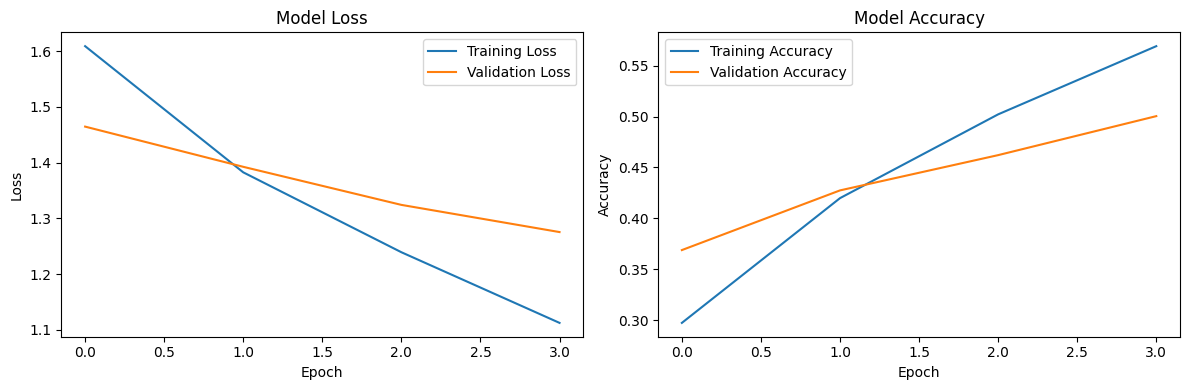

In [95]:
# Initialising the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=100, input_length=100, embeddings_regularizer=l2(1e-6)))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compiling the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_lstm = lstm_model.fit(X_train_nn, y_train_nn, epochs=4, batch_size=64, validation_data=(X_test_nn, y_test_nn))

# Making predictions
y_pred_proba = lstm_model.predict(X_test_nn)
y_pred_lstm = np.argmax(y_pred_proba, axis=1)

# Evaluating the model
lstm_accuracy = lstm_model.evaluate(X_test_nn, y_test_nn)
print(f"LSTM Model Accuracy: {lstm_accuracy[1]:.4f}")

# Printing the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_nn, y_pred_lstm, target_names=encoder.classes_))

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### BERT

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
750/750 [==============================] - 48s 51ms/step - loss: 1.4926 - accuracy: 0.3576 - val_loss: 1.3515 - val_accuracy: 0.4291
Epoch 2/4
750/750 [==============================] - 36s 48ms/step - loss: 1.2415 - accuracy: 0.4923 - val_loss: 1.2207 - val_accuracy: 0.5022
Epoch 3/4
750/750 [==============================] - 36s 48ms/step - loss: 0.9499 - accuracy: 0.6353 - val_loss: 1.1198 - val_accuracy: 0.5809
Epoch 4/4
94/94 [==============================] - 3s 19ms/step
Test Accuracy: 0.6409

Classification Report:

                      precision    recall  f1-score   support

Billing and Payments       0.89      0.96      0.92       470
    Customer Service       0.50      0.53      0.51       484
          IT Support       0.83      0.71      0.77       488
               Other       0.56      0.71      0.63       536
     Product Support       0.53      0.53      0.53       519
   Technical Support       0.58      0.42      0.49       502

            accuracy    

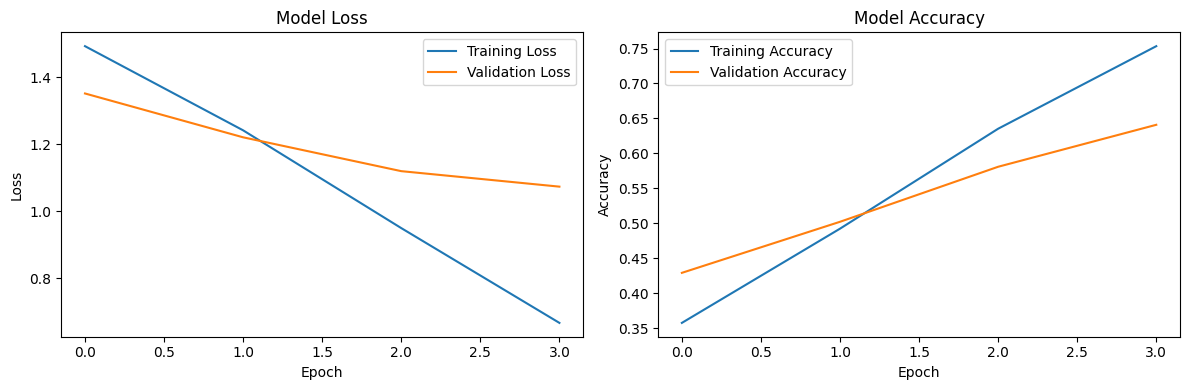

In [ ]:
# Defining the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(encoder.classes_))

# Compiling the model with the Adam optimiser, penalising weights and clipping gradients
optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01, clipnorm=1.0)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Training the model
history = model.fit(
    {'input_ids': X_train_ids, 'attention_mask': X_train_mask}, 
    y_train,
    validation_data=({'input_ids': X_test_ids, 'attention_mask': X_test_mask}, y_test),
    epochs=4,
    batch_size=16,
    verbose=1
)

# Evaluating the model
predictions = model.predict({'input_ids': X_test_ids, 'attention_mask': X_test_mask})
y_pred_bert = predictions.logits  # Get logits from the output
y_pred_labels = np.argmax(y_pred_bert, axis=1)

# Calculating the accuracy score
accuracy = accuracy_score(y_test_bert, y_pred_labels)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Showing the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_bert, y_pred_labels, target_names=encoder.classes_))

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

BERT with dropout

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
750/750 [==============================] - 49s 51ms/step - loss: 1.5698 - accuracy: 0.3095 - val_loss: 1.4339 - val_accuracy: 0.3831
Epoch 2/4
750/750 [==============================] - 36s 48ms/step - loss: 1.4056 - accuracy: 0.4046 - val_loss: 1.4006 - val_accuracy: 0.4155
Epoch 3/4
750/750 [==============================] - 36s 48ms/step - loss: 1.3186 - accuracy: 0.4531 - val_loss: 1.3347 - val_accuracy: 0.4528
Epoch 4/4
94/94 [==============================] - 3s 21ms/step
Test Accuracy: 0.4608

Classification Report:

                      precision    recall  f1-score   support

Billing and Payments       0.75      0.91      0.82       470
    Customer Service       0.32      0.27      0.29       484
          IT Support       0.40      0.66      0.49       488
               Other       0.50      0.46      0.48       536
     Product Support       0.37      0.28      0.32       519
   Technical Support       0.34      0.23      0.28       502

            accuracy    

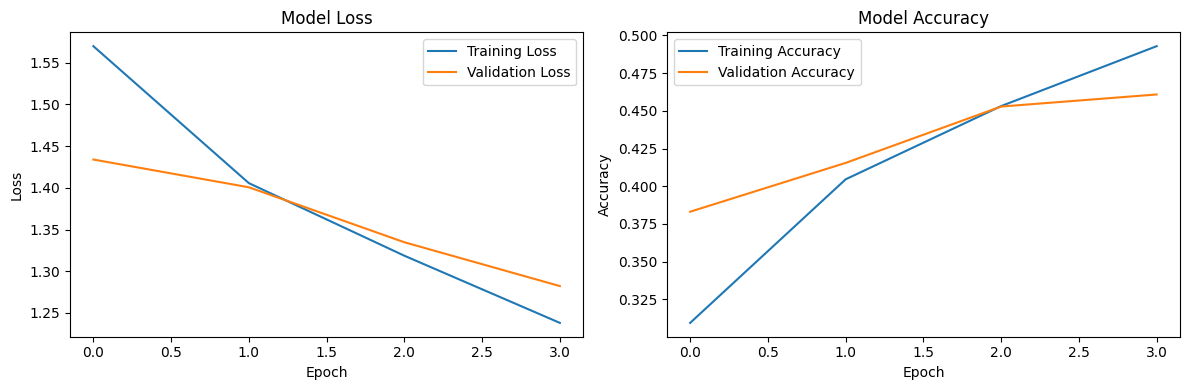

In [ ]:
# Defining the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(encoder.classes_), hidden_dropout_prob=0.3, attention_probs_dropout_prob=0.3)

# Compiling the model with the Adam optimiser, penalising weights and clipping gradients
optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01, clipnorm=1.0)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Training the model
history = model.fit(
    {'input_ids': X_train_ids, 'attention_mask': X_train_mask}, 
    y_train,
    validation_data=({'input_ids': X_test_ids, 'attention_mask': X_test_mask}, y_test),
    epochs=4,
    batch_size=16,
    verbose=1
)

# Evaluating the model
predictions = model.predict({'input_ids': X_test_ids, 'attention_mask': X_test_mask})
y_pred_bert = predictions.logits  # Get logits from the output
y_pred_labels = np.argmax(y_pred_bert, axis=1)

# Calculating the accuracy score
accuracy = accuracy_score(y_test_bert, y_pred_labels)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Showing the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_bert, y_pred_labels, target_names=encoder.classes_))

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()